In [1]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, PReLU, ELU, ThresholdedReLU
from keras.utils import np_utils
import keras.backend as K

import history_tracker, lr_finder_script, sgdr
import pdb

batch_size = 128
nb_classes = 10
nb_epoch = 10

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 1
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

Using TensorFlow backend.


In [2]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


In [ ]:
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                        padding='same',
                        data_format='channels_first', input_shape=(1, img_rows, img_cols)))
model.add(Activation('softplus'))
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                        padding='same',
                        data_format='channels_first', input_shape=(1, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(int(img_rows/2), int(img_cols/2)), padding='same'))

model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

# prepare callback
histories = history_tracker.Histories()
#lr_finder = lr_finder_script.LRFinder(min_lr=5e-3, max_lr=0.5,steps_per_epoch = np.ceil(nb_epoch/batch_size), epochs=nb_epoch) # for old version

lr_finder = LRFinder(model)
lr_finder.find(x_train, y_train, 0.0001, 1, 512, 5)

In [3]:
# fit
model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test), callbacks=[histories,lr_finder])

print(histories.losses)
print(histories.aucs)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 54us/step - loss: 1.6012 - acc: 0.4184 - val_loss: 1.0810 - val_acc: 0.6374
Epoch 2/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.9411 - acc: 0.6886 - val_loss: 0.8776 - val_acc: 0.7049
Epoch 3/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.9437 - acc: 0.6887 - val_loss: 0.8881 - val_acc: 0.7089
Epoch 4/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.9858 - acc: 0.6775 - val_loss: 0.8994 - val_acc: 0.7054
Epoch 5/10
60000/60000 [==============================] - 2s 40us/step - loss: 1.0158 - acc: 0.6692 - val_loss: 0.9161 - val_acc: 0.6990
Epoch 6/10
60000/60000 [==============================] - 2s 40us/step - loss: 1.0611 - acc: 0.6569 - val_loss: 0.8839 - val_acc: 0.6986
Epoch 7/10
60000/60000 [==============================] - 2s 40us/step - loss: 1.1336 - acc: 0.6420 - val_loss: 0.9586 - val_acc

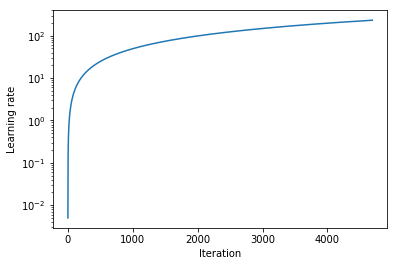

In [4]:
lr_finder.plot_lr();

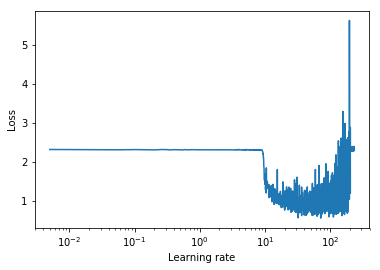

In [5]:
lr_finder.plot_loss()

In [7]:
10e1

100.0